# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

-0.001
0.0
0.0
0.0
0.0
0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.001
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
-0.002
-0.002
-0.003
0.0
-0.002
-0.002
-0.002
1.009
1.009
1.008
1.007
2.015
2.017
2.019
2.019
2.019
3.015
3.018
3.02
3.019
3.019
4.005
4.007
4.009
4.008
4.008
4.991
4.993
4.995
4.994
4.994
5.979
5.979
5.978
5.978
5.978
6.714
6.715
6.714
6.714
7.45
7.45
7.449
7.449
8.433
8.435
8.437
8.436
8.435
9.422
9.427
9.427
9.427
9.426
10.412
10.414
10.416
10.414
10.414
11.4
11.403
11.406
11.402
11.403
11.403
12.411
12.412
12.411
12.411
13.394
13.396
13.399
13.397
13.398
14.162
14.164
14.166
14.166
14.167
14.932
14.934
14.935
14.935
14.935
15.948
15.948
15.947
15.947
16.959
16.959
16.958
16.958
17.97
17.969
17.969
17.968
18.957
18.957
18.956
18.956
19.966
19.966
19.965
19.965
19.965
20.974
20.973
21.62
21.62
21.619
22.293
22.293
22.291
22.291
23.302
23.302
23.301
23.3
24.311
24.31
24.309
24.309
25.319
25.318
25.317
25.317
26.328
26.326
2

58.882
58.91
58.94
58.969
59.002
59.029
59.062
59.061
59.061
59.061
59.069
59.069
59.069
59.07
59.069
59.069
59.069
59.069
59.069
59.069
59.068
59.068
59.07
59.07
59.07
59.069
59.069
59.069
59.068
59.067
59.067
59.067
59.067
59.067
59.067
59.067
59.067
59.066
59.066
59.066
59.065
59.065
59.064
59.064
59.064
59.063
59.063
59.063
59.064
59.064
59.064
59.064
59.064
59.064
59.062
59.062
59.062
59.062
59.092
59.124
59.157
59.189
59.221
59.255
59.255
59.255
59.254
59.254
59.254
59.254
59.254
59.253
59.274
59.273
59.273
59.273
59.273
59.273
59.273
59.273
59.273
59.273
59.273
59.273
59.272
59.271
59.272
59.272
59.272
59.272
59.272
59.271
59.271
59.271
59.27
59.27
59.27
59.27
59.27
59.27
59.27
59.27
59.27
59.27
59.27
59.27
59.27
59.27
59.27
59.268
59.268
59.268
59.268
59.376
59.376
59.376
59.375
59.375
59.376
59.376
59.374
59.375
59.39
59.39
59.39
59.39
59.389
59.389
59.388
59.386
59.389
59.39
59.389
59.389
59.388
59.388
59.388
59.388
59.388
59.388
59.387
59.387
59.387
59.387
59.387
59.387
59.3

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,-0.001
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1529,3058,60.914
1530,3060,60.913
1531,3062,60.913
1532,3064,60.914


<IPython.core.display.Javascript object>


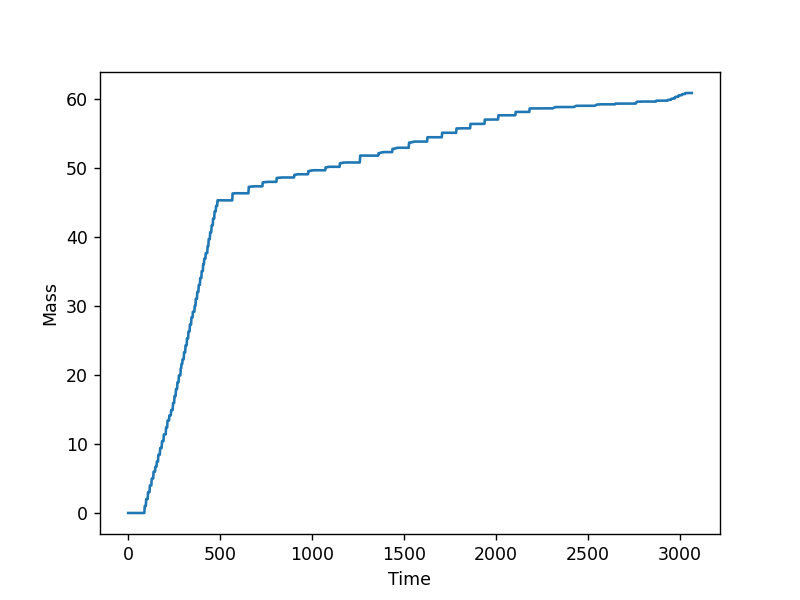

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_140323_S169-174.csv')